<a href="https://colab.research.google.com/github/HarshithaS2023/Visualization/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Run this to import libraries and your data! { display-mode: "form" }
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv).
import os # Good for navigating your computer's files
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

# Our dataset is hosted on Google Cloud. Here's how we can grab it:
!wget -q --show-progress "https://docs.google.com/spreadsheets/d/14EQvx51aKEh8OZwcFWwg1tNbkP2pHkK5akghl7DB-4c/edit?usp=sharing"

# Quiet deprecation warnings
import warnings
warnings.filterwarnings("ignore")

edit?usp=sharing        [ <=>                ] 271.48K  --.-KB/s    in 0.05s   


# Data Retrieval

In [ ]:
data_path  = 'vis.csv'
vis_data = pd.read_csv(data_path)
vis_data["date"] = pd.to_datetime(vis_data["date"], format='%m/%d/%Y')

In [ ]:
vis_data.head()

,date,total_pizzas,total_in_pizzas,chicken_family,chicken_large,chicken_medium,chicken_small,chicken_total,veggie_family,veggie_large,...,door_v_family,door_v_large,door_v_medium,door_v_small,door_v_total,door_h_family,door_h_large,door_h_medium,door_h_small,door_h_total
0,2023-10-04,287,222,23,21,19,9,72,28,58,...,6,10,19,8,43,1,0,2,0,3
1,2023-10-11,275,225,15,36,21,4,76,38,59,...,5,6,10,7,28,0,1,0,2,3
2,2023-10-18,232,180,20,29,18,6,73,24,36,...,3,11,8,4,26,2,1,1,0,4
3,2023-10-25,236,184,14,30,15,8,67,29,42,...,4,7,11,6,28,1,0,2,0,3
4,2023-11-01,255,215,10,40,18,8,76,16,56,...,1,1,5,14,21,0,0,1,1,2


In [ ]:
vis_data[['total_pizzas']].head()

,total_pizzas
0,287
1,275
2,232
3,236
4,255


# Cheese & Pizzas


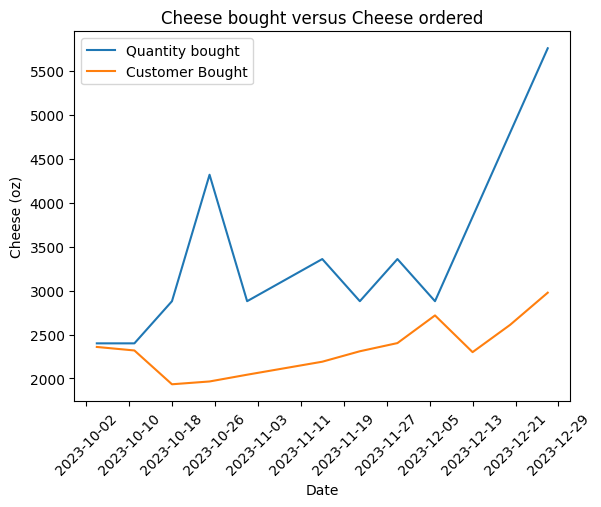

In [ ]:
date = vis_data[['date']]
bought = vis_data[['cheese_bought_oz']]
order = vis_data[['cheese_total']]
plt.plot(date, bought, label="Quantity bought")
plt.plot(date, order, label="Customer Bought")
plt.plot()

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(vis_data['date'])))
plt.xlabel("Date")
plt.ylabel("Cheese (oz)")
plt.title("Cheese bought versus Cheese ordered")
plt.legend()
plt.show()


# Total Pizzas

Don't touch this, it works

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

# Convert 'date' column to datetime format
vis_data['date'] = pd.to_datetime(vis_data['date'])

# Set the 'date' column as the index
vis_data.set_index('date', inplace=True)



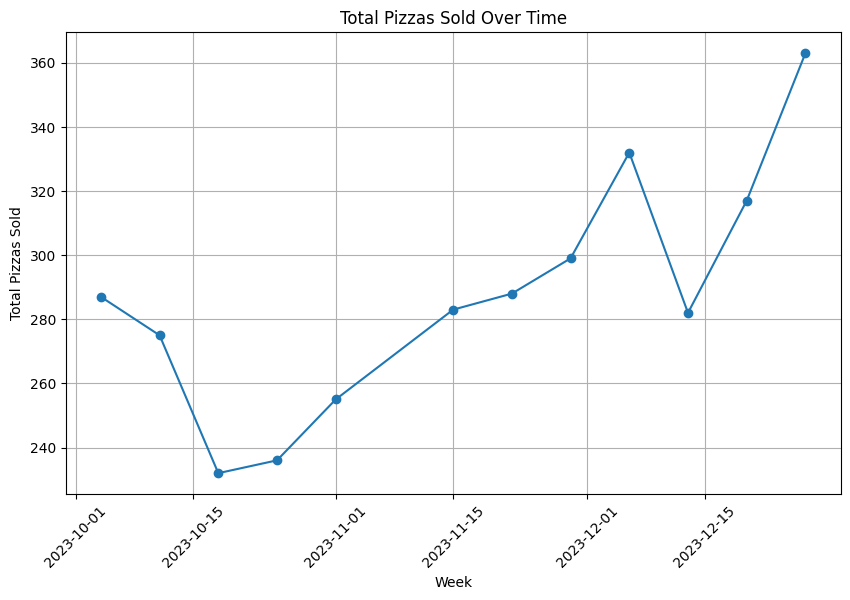

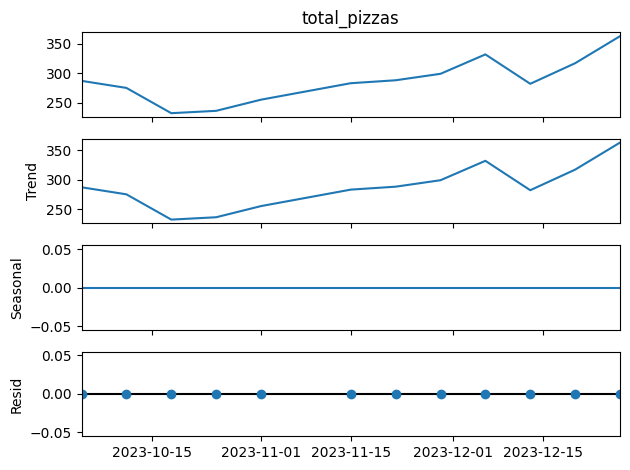

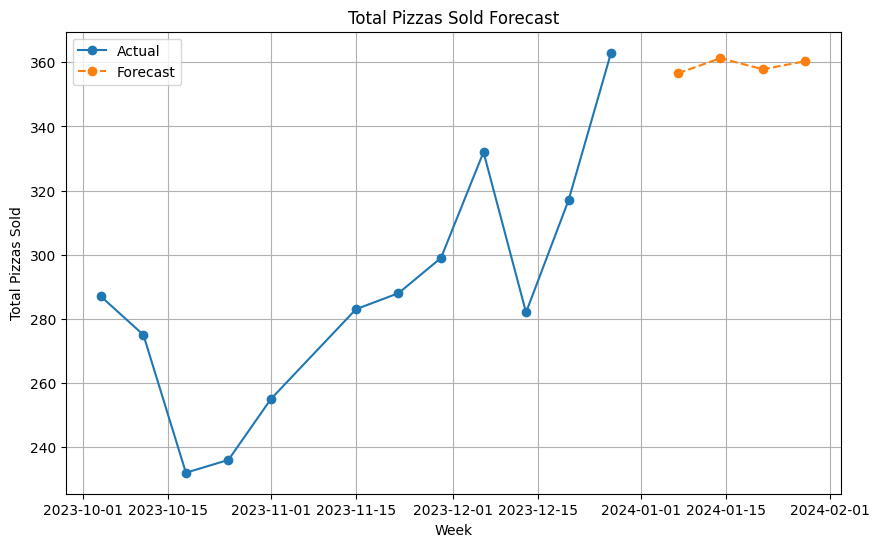

Forecasted total pizzas sold for the next 4 weeks:
4
Week 2024-01-03 00:00:00: 356.57
Week 2024-01-10 00:00:00: 361.29
Week 2024-01-17 00:00:00: 357.83
Week 2024-01-24 00:00:00: 360.37


In [ ]:
# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(vis_data.index, vis_data['total_pizzas'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Total Pizzas Sold Over Time')
plt.xlabel('Week')
plt.ylabel('Total Pizzas Sold')
plt.grid(True)
plt.show()

# Decompose the time series to analyze its components
decomposition = seasonal_decompose(vis_data['total_pizzas'], model='additive', period=1)  # Set period=1 for non-seasonal data
decomposition.plot()
plt.show()

# ARIMA model
model = ARIMA(vis_data['total_pizzas'], order=(1,1,1))
model_fit = model.fit()

# Forecast
forecast_steps = 4  # Number of weeks to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(vis_data.index, vis_data['total_pizzas'], label='Actual', marker='o', linestyle='-')
plt.plot(pd.date_range(start=vis_data.index[-1], periods=forecast_steps + 1, freq='W')[1:], forecast, label='Forecast', marker='o', linestyle='--')
plt.title('Total Pizzas Sold Forecast')
plt.xlabel('Week')
plt.ylabel('Total Pizzas Sold')
plt.legend()
plt.grid(True)
plt.show()

# Print forecast
print("Forecasted total pizzas sold for the next {} weeks:".format(forecast_steps))
print(forecast_steps)
pd.DateOffset(weeks=0+1)
forecast
vis_data.index[-1]
for i in range(forecast_steps):
    print("Week {}: {:.2f}".format(vis_data.index[-1] + pd.DateOffset(weeks=i+1), forecast[i+12]))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual values
actual_values = vis_data['total_pizzas'][-forecast_steps:]

# Forecasted values
forecast_values = forecast

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, forecast_values)
print("Mean Absolute Error (MAE):", mae)



Mean Absolute Error (MAE): 36.83126387339232
Mean Squared Error (MSE): 2141.1355915628096
Root Mean Squared Error (RMSE): 46.27240637315948


# Cheese

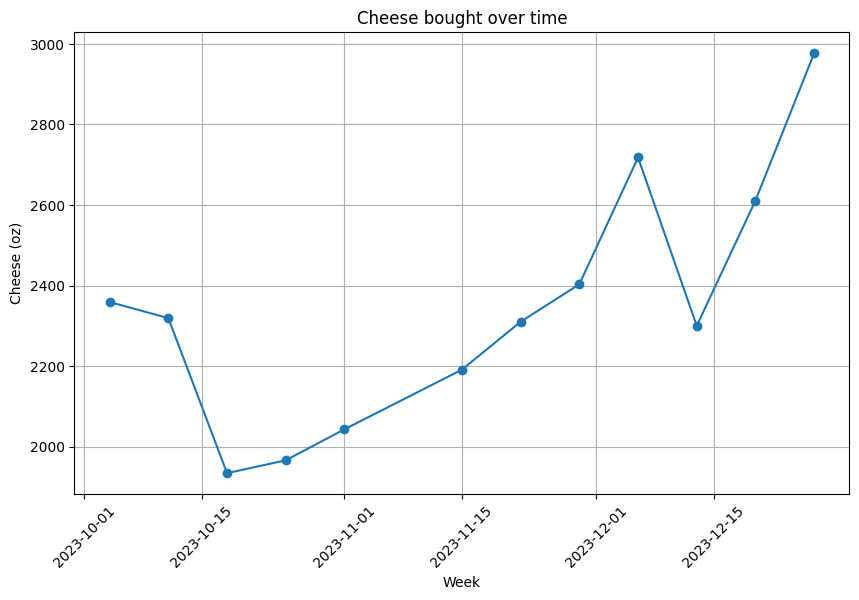

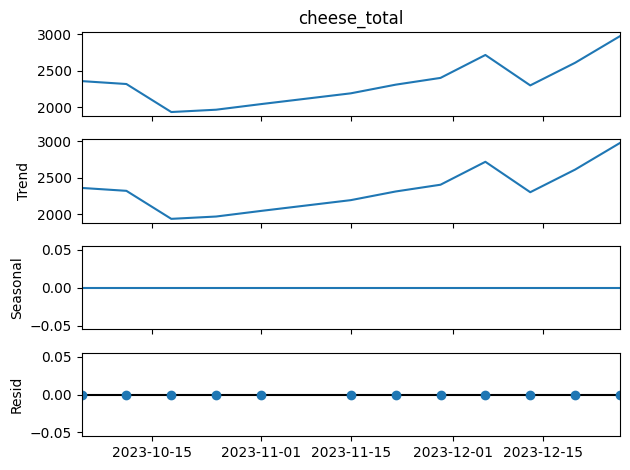

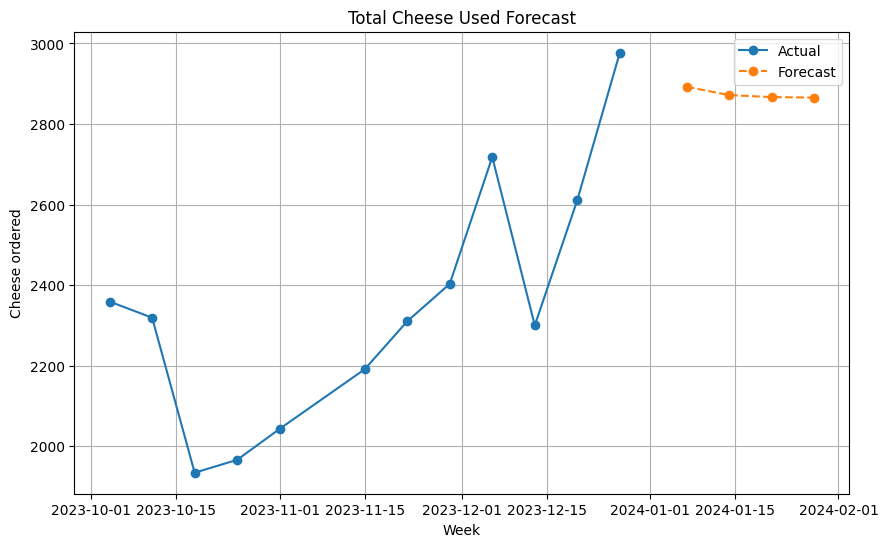

Forecasted cheese bought for the next 4 weeks:
4
Week of 2024-01-03 00:00:00: 2892.35
Week of 2024-01-10 00:00:00: 2871.81
Week of 2024-01-17 00:00:00: 2866.82
Week of 2024-01-24 00:00:00: 2865.62


In [ ]:
# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(vis_data.index, vis_data['cheese_total'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Cheese bought over time')
plt.xlabel('Week')
plt.ylabel('Cheese (oz)')
plt.grid(True)
plt.show()

# Decompose the time series to analyze its components
decomposition = seasonal_decompose(vis_data['cheese_total'], model='additive', period=1)  # Set period=1 for non-seasonal data
decomposition.plot()
plt.show()

# ARIMA model
model = ARIMA(vis_data['cheese_total'], order=(1,1,1))
model_fit = model.fit()

# Forecast
forecast_steps = 4  # Number of weeks to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(vis_data.index, vis_data['cheese_total'], label='Actual', marker='o', linestyle='-')
plt.plot(pd.date_range(start=vis_data.index[-1], periods=forecast_steps + 1, freq='W')[1:], forecast, label='Forecast', marker='o', linestyle='--')
plt.title('Total Cheese Used Forecast')
plt.xlabel('Week')
plt.ylabel('Cheese ordered')
plt.legend()
plt.grid(True)
plt.show()

# Print forecast
print("Forecasted cheese bought for the next {} weeks:".format(forecast_steps))
print(forecast_steps)
pd.DateOffset(weeks=0+1)
forecast
vis_data.index[-1]
for i in range(forecast_steps):
    print("Week of {}: {:.2f}".format(vis_data.index[-1] + pd.DateOffset(weeks=i+1), forecast[i+12]))

In [ ]:
#These are rounded values
for i in range(forecast_steps):
  rounded_forecast = round(forecast[i + 12] / (80 * 6))
  print("Week of {}: buy {:.2f} boxes".format(vis_data.index[-1] + pd.DateOffset(weeks=i+1), rounded_forecast))

Week of 2024-01-03 00:00:00: buy 6.00 boxes
Week of 2024-01-10 00:00:00: buy 6.00 boxes
Week of 2024-01-17 00:00:00: buy 6.00 boxes
Week of 2024-01-24 00:00:00: buy 6.00 boxes




# Distribution of Pizza types per week

Please enter the date: 11/1/2023


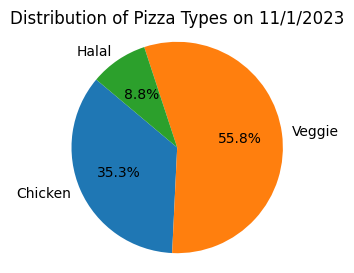

In [ ]:
#Store orders
date_input = input("Please enter the date: ")
# Extract total counts for each pizza type for the specific date (10/4/2023)
pizza_types = ['chicken_total', 'veggie_total', 'halal_total']
pizza_counts = [vis_data.loc[date_input, pizza_type] for pizza_type in pizza_types]

labels = ['Chicken', 'Veggie', 'Halal']
# Plot the pie chart
plt.figure(figsize=(3, 3))
plt.pie(pizza_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pizza Types on ' + date_input)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


# Distribution of Pizza Sizes per Pizza type per week

Please enter the date for DoorDash pie chart: 11/1/2023


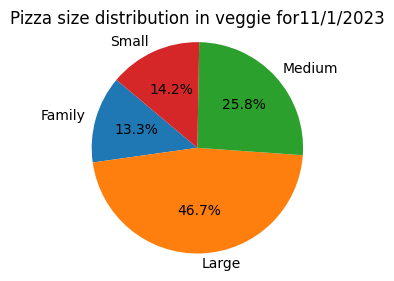

In [ ]:
#DoorDash Orders
date_door_input = input("Please enter the date for DoorDash pie chart: ")
# Extract total counts for each pizza type for the specific date (10/4/2023)
pizza_types = ['veggie_family', 'veggie_large', 'veggie_medium', 'veggie_small']
pizza_counts = [vis_data.loc[date_door_input, pizza_type] for pizza_type in pizza_types]

labels = ['Family', 'Large', 'Medium', 'Small']
# Plot the pie chart
plt.figure(figsize=(3, 3))
plt.pie(pizza_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pizza size distribution in veggie for' + date_door_input)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


Please enter the date for DoorDash pie chart: 11/1/2023


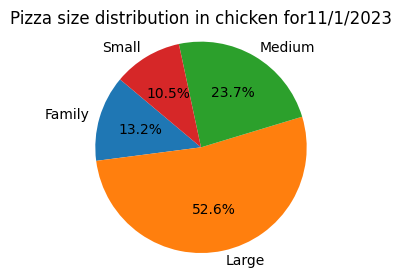

In [ ]:
#DoorDash Orders
date_door_input = input("Please enter the date for DoorDash pie chart: ")
# Extract total counts for each pizza type for the specific date (10/4/2023)
pizza_types = ['chicken_family', 'chicken_large', 'chicken_medium', 'chicken_small']
pizza_counts = [vis_data.loc[date_door_input, pizza_type] for pizza_type in pizza_types]

labels = ['Family', 'Large', 'Medium', 'Small']
# Plot the pie chart
plt.figure(figsize=(3, 3))
plt.pie(pizza_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pizza size distribution in chicken for' + date_door_input)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


Please enter the date for DoorDash pie chart: 11/1/2023


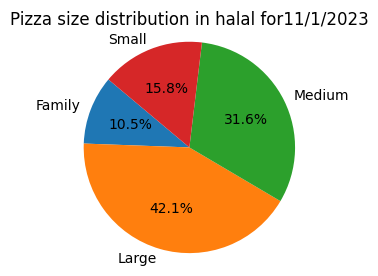

In [ ]:
#DoorDash Orders
date_door_input = input("Please enter the date for DoorDash pie chart: ")
# Extract total counts for each pizza type for the specific date (10/4/2023)
pizza_types = ['halal_family', 'halal_large', 'halal_medium', 'halal_small']
pizza_counts = [vis_data.loc[date_door_input, pizza_type] for pizza_type in pizza_types]

labels = ['Family', 'Large', 'Medium', 'Small']
# Plot the pie chart
plt.figure(figsize=(3, 3))
plt.pie(pizza_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pizza size distribution in halal for' + date_door_input)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


Please enter the date for DoorDash pie chart: 11/1/2023


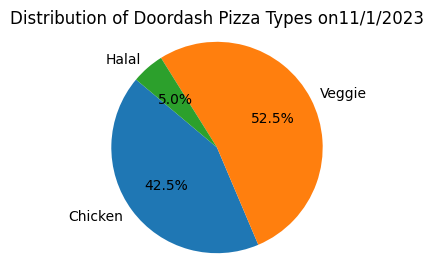

In [ ]:
#DoorDash Orders
date_door_input = input("Please enter the date for DoorDash pie chart: ")
# Extract total counts for each pizza type for the specific date (10/4/2023)
pizza_types = ['door_c_total', 'door_v_total', 'door_h_total']
pizza_counts = [vis_data.loc[date_door_input, pizza_type] for pizza_type in pizza_types]

labels = ['Chicken', 'Veggie', 'Halal']
# Plot the pie chart
plt.figure(figsize=(3, 3))
plt.pie(pizza_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Doordash Pizza Types on' + date_door_input)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In this, this will tell the size distribution per pizza type changing from family, large, medium, and small

# Pizza Distribution over time

Gives the information with all how many ever dates one has in the dataset

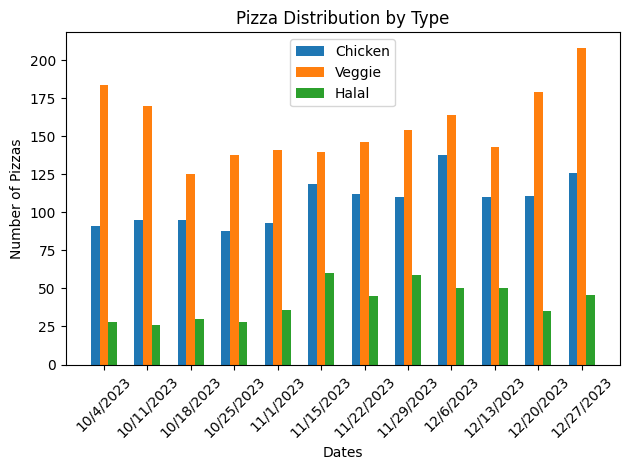

In [ ]:
# Read the CSV file
df = pd.read_csv('vis.csv')
# Extract data from the DataFrame
dates = df['date']
chicken_pizzas = df['chicken_total'] + df['door_c_total']
veggie_pizzas = df['veggie_total'] + df['door_v_total']
halal_pizzas = df['halal_total'] + df['door_c_total']

# Define the width of each bar
bar_width = 0.2

# Define the positions for each group of bars
x = np.arange(len(dates))

# Create the bar chart
plt.bar(x, chicken_pizzas, width=bar_width, label='Chicken')
plt.bar(x + bar_width, veggie_pizzas, width=bar_width, label='Veggie')
plt.bar(x + 2*bar_width, halal_pizzas, width=bar_width, label='Halal')

# Add labels and title
plt.xlabel('Dates')
plt.ylabel('Number of Pizzas')
plt.title('Pizza Distribution by Type')
plt.xticks(x + bar_width, dates, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Gives the last 4 weeks data

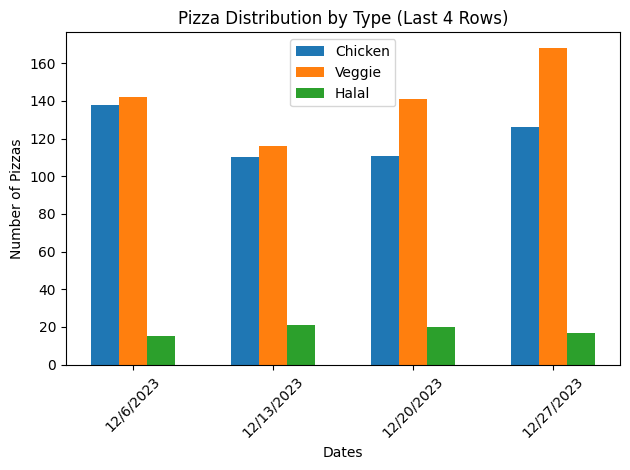

In [ ]:
# Get the last 4 rows of the DataFrame
last_4_rows = df.tail(4)

# Combine chicken_total and door_c_total into a single column
total_chicken_pizzas = last_4_rows['chicken_total'] + last_4_rows['door_c_total']

# Extract other data from the DataFrame
dates = last_4_rows['date']
veggie_pizzas = last_4_rows['veggie_total']
halal_pizzas = last_4_rows['halal_total']

# Define the width of each bar
bar_width = 0.2

# Define the positions for each group of bars
x = np.arange(len(dates))

# Create the bar chart
plt.bar(x, total_chicken_pizzas, width=bar_width, label='Chicken')
plt.bar(x + bar_width, veggie_pizzas, width=bar_width, label='Veggie')
plt.bar(x + 2*bar_width, halal_pizzas, width=bar_width, label='Halal')

# Add labels and title
plt.xlabel('Dates')
plt.ylabel('Number of Pizzas')
plt.title('Pizza Distribution by Type (Last 4 Rows)')
plt.xticks(x + bar_width, dates, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
